In [1]:
# Make sure modules are reimported each time to update changes
%reload_ext autoreload
%autoreload 2

import pprint

import matplotlib.pyplot as plt


In [2]:
import yaml

with open("./example1_config.yaml", "r") as ymlfile:
    cfg = yaml.safe_load(ymlfile)

print(cfg)

{'climate': {'palaeoclimate': {'pc_excel': './example_data/climate_data/palaeoclimate_data/northern_england_palaeoclimate_from_westaway_and_younger_2013.xlsx', 'pc_sigma_ty_type': 'constant_assigned', 'pc_sigma_ty_cst': '1e3', 'pc_sigma_ty_dist': 'normal', 'pc_sigma_deltaTs_type': 'constant_assigned', 'pc_sigma_deltaTs_cst': 0.5, 'pc_sigma_deltaTs_dist': 'normal'}, 'recent_climate': {'rc_filename': 'ZonAnn.Ts+dSST', 'rc_input_csv': './example_data/climate_data/recent_climate_data/raw_data/ZonAnn.Ts+dSST.csv', 'rc_calc_folder': './example_data/climate_data/recent_climate_data/calculated_data', 'rc_sigma_ty_type': 'constant_assigned', 'rc_sigma_ty_cst': 0.5, 'rc_sigma_ty_smoothing_cutoff_cst': 'rc_sigma_ty_cst', 'rc_sigma_deltaTs_cst': 0.1, 'rc_sigma_deltaTs_smoothed_cst': 0.1, 'rc_sigma_ty_dist': 'normal', 'rc_sigma_ty_smoothing_cutoff_dist': 'normal', 'rc_sigma_deltaTs_dist': 'normal', 'rc_sigma_deltaTs_smoothed_dist': 'normal', 'rc_smoother': 'boxcar', 'rc_smoothing_length': 9}}, 'bor

# TODO Sort all suffixes out so properly modular. Add structures for plotting (e.g. dictionaries) into output of each operation. Initialise all attributes in __init__? https://python-textbok.readthedocs.io/en/1.0/Classes.html

In [3]:
from BoreFlow import boreholehandler

borehole = boreholehandler.BoreHole(cfg)

print(vars(borehole.data.borehole))


borehole.test_value_creation('bigboy')

print(vars(getattr(borehole.data.borehole, 'bigboy')))

# xd = getattr(self.data.borehole, 'bigboy')

# print(xd)

# print(vars(borehole.data.borehole))
# print((borehole.data.borehole.bigboy))
# print(getattr(borehole.data.borehole, 'bigboy'))

{}
{'temp': array([1, 2, 3, 4])}


temp
['T', 'T_error', 'T_suffix', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'z', 'z_error']
['T', 'T_error', 'T_suffix', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'z', 'z_error']
[  6.12   9.18  12.24  15.31  18.37  21.43  24.49  27.55  30.61  33.67
  36.73  39.79  42.86  45.92  48.98  52.04  55.1   58.16  61.22  64.28
  67.34  70.41  73.47  76.53  79.59  82.65  85.71  88.77  91.83  94.89
  97

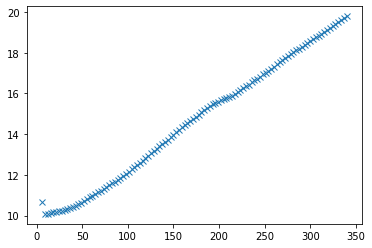

In [4]:
from BoreFlow import boreholehandler

borehole = boreholehandler.BoreHole(cfg)

loadsuffix = borehole.load_temperature_measurements("temp")
print(loadsuffix)

print(dir(getattr(borehole.data.borehole, loadsuffix)))
print(dir(borehole.data.borehole.temp))

print(borehole.data.borehole.temp.z)

plt.plot(borehole.data.borehole.temp.z, borehole.data.borehole.temp.T, 'x')



Cut temperature data at top of borehole

cut_top_depth
tempct100.0m
['T', 'T_error', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'z', 'z_error']
[101.02 104.08 107.14 110.2  113.26 116.32 119.38 122.44 125.5  128.57
 131.63 134.69 137.75 140.81 143.87 146.93 149.99 153.05 156.12 159.18
 162.24 165.3  168.36 171.42 174.48 177.54 180.6  183.67 186.73 189.79
 192.85 195.91 198.97 202.03 205.09 208.15 211.22 214.28 217.34 220.4
 223.46 226.52 229.58 232.64 235.7  238.77 241.83 244.89 247.95 251.01
 254.07 257.13 260.19 263.25 266.31 269.38 272.44 275.5  278.56 281.62
 284.68 287.74 290.8  293.86 296.93 299.99 303.05 306.11 309.17 312.23
 315.29 318.35 321.41 324.48 327.54 330.6  333.66 336.72 339.78]


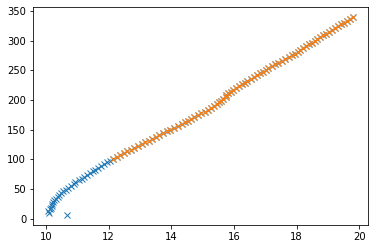

In [9]:
cutsuffix = borehole.cut_top_temperature_measurements(loadsuffix)
print(cutsuffix)

print(dir(getattr(borehole.data.borehole, cutsuffix)))
print(getattr(borehole.data.borehole, cutsuffix).z)

# Plot to show cut data
plt.plot(getattr(borehole.data.borehole, loadsuffix).T, getattr(borehole.data.borehole, loadsuffix).z, 'x')
plt.plot(getattr(borehole.data.borehole, cutsuffix).T, getattr(borehole.data.borehole, cutsuffix).z, 'x')
plt.show()



Select bottom-hole depth

In [5]:
borehole.select_bottomhole_temperature()

In [6]:
print(borehole.data.borehole.zT_m_bottomhole)
print(borehole.data.borehole.T_bottomhole_suffix)

339.78
_Tbthdpst339.78m


Add cut base depth

Subsample temperature measurements

In [20]:
subsamplesuffix = borehole.subsample_temperature(cutsuffix)

print(subsamplesuffix)

tempct100.0m_ssrnd2.0


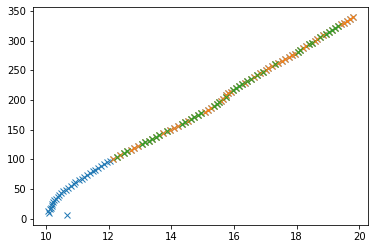

In [21]:
# Plot to show subsampled data
plt.plot(getattr(borehole.data.borehole, loadsuffix).T, getattr(borehole.data.borehole, loadsuffix).z, 'x')
plt.plot(getattr(borehole.data.borehole, cutsuffix).T, getattr(borehole.data.borehole, cutsuffix).z, 'x')
plt.plot(getattr(borehole.data.borehole, subsamplesuffix).T, getattr(borehole.data.borehole, subsamplesuffix).z, 'x')

plt.show()

perturb T

In [22]:
perturbsuffix = borehole.perturb_temperature(subsamplesuffix)

print(perturbsuffix)

tempct100.0m_ssrnd2.0_pertnorm


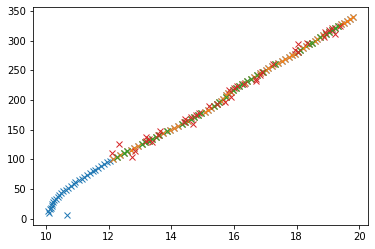

In [23]:
# Plot to show perturbed data
plt.plot(getattr(borehole.data.borehole, loadsuffix).T, getattr(borehole.data.borehole, loadsuffix).z, 'x')
plt.plot(getattr(borehole.data.borehole, cutsuffix).T, getattr(borehole.data.borehole, cutsuffix).z, 'x')
plt.plot(getattr(borehole.data.borehole, subsamplesuffix).T, getattr(borehole.data.borehole, subsamplesuffix).z, 'x')
plt.plot(getattr(borehole.data.borehole, perturbsuffix).T, getattr(borehole.data.borehole, perturbsuffix).z, 'x')

plt.show()

# Add plotting